# Clustering Wine Datset

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Importing data

In [2]:
X = pd.read_csv('wine.data.csv')
#Shuffling data
X = X.sample(frac=1)
X.head()

,Region,\tAlcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
46,1,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065
124,2,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380
13,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
113,2,11.41,0.74,2.50,21.0,88,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434
140,3,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600


# Scaling features

In [3]:
mms = MinMaxScaler()
mms.fit(X)
X=mms.transform(X)
print(X)

[[0.         0.88157895 0.56324111 ... 0.45528455 0.79487179 0.56134094]
 [0.5        0.22105263 0.7055336  ... 0.2195122  0.86813187 0.07275321]
 [0.         0.97894737 0.19565217 ... 0.62601626 0.53479853 0.62196862]
 ...
 [0.         0.87894737 0.23913043 ... 0.30894309 0.7985348  0.85734665]
 [1.         0.56315789 0.87944664 ... 0.09756098 0.07692308 0.31883024]
 [0.5        0.15526316 0.24703557 ... 0.55284553 0.61904762 0.04778887]]


# Visualising clusters

### Reducing dimensionality

In [4]:
#reducing dimensions using PCA for plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_2D = pca.transform(X)
print(X)
x = X_2D[:,0]
y = X_2D[:,1]

[[0.         0.88157895 0.56324111 ... 0.45528455 0.79487179 0.56134094]
 [0.5        0.22105263 0.7055336  ... 0.2195122  0.86813187 0.07275321]
 [0.         0.97894737 0.19565217 ... 0.62601626 0.53479853 0.62196862]
 ...
 [0.         0.87894737 0.23913043 ... 0.30894309 0.7985348  0.85734665]
 [1.         0.56315789 0.87944664 ... 0.09756098 0.07692308 0.31883024]
 [0.5        0.15526316 0.24703557 ... 0.55284553 0.61904762 0.04778887]]


 ### Plotting

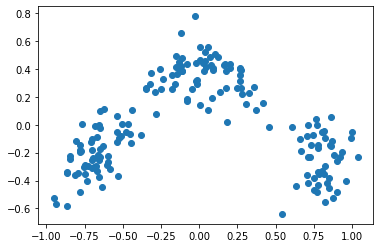

In [5]:
import matplotlib.pyplot as plt

plt.scatter(x,y)

Visually there are three clusters, but using the **elbow method** will give a more accurate number of clusters.

# KMeans Elbow method

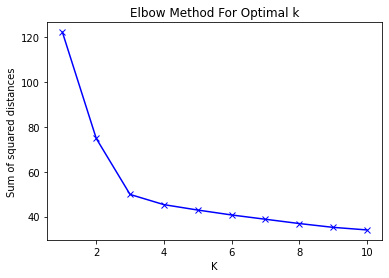

In [6]:
ssd = [] #sum of squared distances
K = range(1,11)
for i in K:
    km = KMeans(n_clusters = i)
    km.fit(X)
    km.transform(X)
    ssd.append(km.inertia_)

plt.plot(K, ssd, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**3** looks like the most optimal number of clusters

# Test and Training split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42, shuffle=False) #already shuffeld at start
#the reason it is not shuffled here is when PCA is being applied to the train and test datasets, it gets scaled
# differently and does not fit the graph properly.

In [8]:
km = KMeans(n_clusters = 3)
km.fit(X_train)
km.transform(X_train)
y_kmeans = km.predict(X_train)
clusterpoints = pca.fit_transform(km.cluster_centers_)
x= pca.fit_transform(X_train)
print(clusterpoints)

[[-0.70887529 -0.2100967 ]
 [ 0.75307574 -0.17515385]
 [-0.04420045  0.38525054]]


<function matplotlib.pyplot.show(close=None, block=None)>

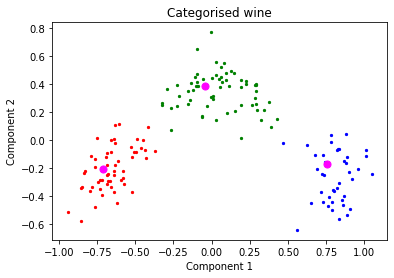

In [9]:
plt.scatter(x[:,0][y_kmeans==0], x[:,1][y_kmeans==0], s=5, c='red', label ='Cluster 1')
plt.scatter(x[:,0][y_kmeans==1], x[:,1][y_kmeans==1], s=5, c='blue', label ='Cluster 2')
plt.scatter(x[:,0][y_kmeans==2], x[:,1][y_kmeans==2], s=5, c='green', label ='Cluster 3')
plt.scatter(clusterpoints[:,0], clusterpoints[:,1], s=50, c='magenta', label = 'Centroids')
plt.title('Categorised wine')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show

# Use?

Now, given a new sample with certain features, we can predict which group it belongs to apply common analysis of its qualities and stuff etc.

In [10]:
# for example, the 10% test data can be used here
y_t = km.predict(X_test)
x_t = pca.fit_transform(X_test) 

<function matplotlib.pyplot.show(close=None, block=None)>

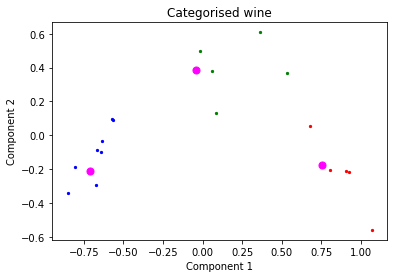

In [11]:
plt.scatter(x_t[:,0][y_t==0], x_t[:,1][y_t==0], s=5, c='red', label ='Cluster 1')
plt.scatter(x_t[:,0][y_t==1], x_t[:,1][y_t==1], s=5, c='blue', label ='Cluster 2')
plt.scatter(x_t[:,0][y_t==2], x_t[:,1][y_t==2], s=5, c='green', label ='Cluster 3')
plt.scatter(clusterpoints[:,0], clusterpoints[:,1], s=50, c='magenta', label = 'Centroids')
plt.title('Categorised wine')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show